In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02

In [3]:
reg = 'M8S'
line = 'M8S'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

6.711332879527353

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
dlog=-0.225

In [8]:
table = sosflog(data,dlog)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                              \
       count      mean       std       min       25%       50%       75%   
ils                                                                        
0     1687.0  6.465559  0.456634  5.956738  6.119994  6.345865  6.681812   
1    28679.0  4.391881  0.598161  3.548143  3.888767  4.288945  4.794336   
2    36395.0  2.805511  0.409338  2.113549  2.453750  2.790465  3.151048   
3    21392.0  1.695762  0.246216  1.258926  1.482434  1.700472  1.909439   
4    10120.0  1.013848  0.145290  0.749915  0.890291  1.018091  1.140938   
5     4305.0  0.606991  0.087394  0.446734  0.532928  0.611067  0.683329   
6     1583.0  0.363166  0.051454  0.266261  0.320250  0.367917  0.407001   
7      575.0  0.217552  0.030852  0.158515  0.192218  0.220388  0.245153   
8      227.0  0.129893  0.018727  0.094716  0.114904  0.132089  0.146380   
9       72.0  0.077452  0.010950  0.057886  0.067905  0.079619  0.086737   
10      28.0  0.044006  0.006445  0.033507  0.039012  0.043629  0.048625   
11      17.0  0.028476  0.003704  0.020064  0.026412  0.029982  0.031330   

                   dV2                                                  \
          max    count       mean        std     min       25%     50%   
ils                                                                      
0    9.021350   1687.0  14.176898  15.608846  0.0000  2.576050  9.1809   
1    5.955948  28679.0  10.487953  15.748951  0.0000  1.060900  4.7089   
2    3.548049  36395.0  17.948910  21.544537  0.0000  2.190400  9.9856   
3    2.113482  21392.0  14.794455  19.101845  0.0000  1.345600  6.6564   
4    1.258879  10120.0   8.340102  12.162953  0.0000  0.846400  3.5344   
5    0.749755   4305.0   5.369562   8.523575  0.0000  0.476100  2.1609   
6    0.446611   1583.0   4.275844  11.038193  0.0000  0.348100  1.4400   
7    0.265811    575.0   2.602310   5.231142  0.0000  0.160000  0.8464   
8    0.158329    227.0   1.901495   5.511710  0.0000  0.099250  0.4096   
9    0.094043     72.0   0.727212   1.431730  0.0000  0.088525  0.2810   
10   0.054972     28.0   0.440832   0.519572  0.0001  0.022500  0.2644   
11   0.032081     17.0   0.162976   0.215104  0.0036  0.008100  0.0784   

                          
           75%       max  
ils                       
0    20.160100  108.3681  
1    13.616100  196.8409  
2    26.112100  207.6481  
3    21.436900  149.5729  
4    10.692900  130.8736  
5     6.708100   91.9681  
6     4.243600  182.7904  
7     2.722500   58.0644  
8     1.440000   62.7264  
9     0.693075    9.9856  
10    0.714100    2.1316  
11    0.193600    0.7225

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.7817006152527894

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.21073460714007156

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

6.929444147937065

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
m = 1.15

In [16]:
rgrid = np.logspace(-2, 1)

(6.711332879527353, 0.7817006152527894, 1.15)

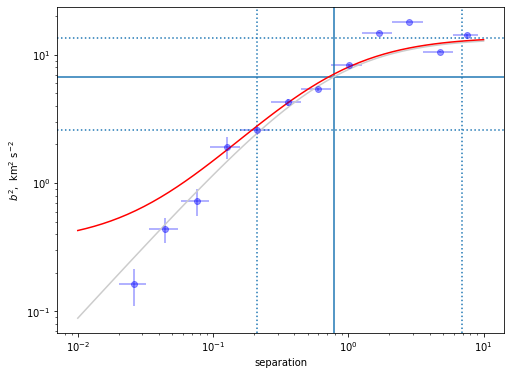

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.05), color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [18]:
table

s                                                              \
       count      mean       std       min       25%       50%       75%   
ils                                                                        
0     1687.0  6.465559  0.456634  5.956738  6.119994  6.345865  6.681812   
1    28679.0  4.391881  0.598161  3.548143  3.888767  4.288945  4.794336   
2    36395.0  2.805511  0.409338  2.113549  2.453750  2.790465  3.151048   
3    21392.0  1.695762  0.246216  1.258926  1.482434  1.700472  1.909439   
4    10120.0  1.013848  0.145290  0.749915  0.890291  1.018091  1.140938   
5     4305.0  0.606991  0.087394  0.446734  0.532928  0.611067  0.683329   
6     1583.0  0.363166  0.051454  0.266261  0.320250  0.367917  0.407001   
7      575.0  0.217552  0.030852  0.158515  0.192218  0.220388  0.245153   
8      227.0  0.129893  0.018727  0.094716  0.114904  0.132089  0.146380   
9       72.0  0.077452  0.010950  0.057886  0.067905  0.079619  0.086737   
10      28.0  0.044006  0.006445  0.033507  0.039012  0.043629  0.048625   
11      17.0  0.028476  0.003704  0.020064  0.026412  0.029982  0.031330   

                   dV2                                                  \
          max    count       mean        std     min       25%     50%   
ils                                                                      
0    9.021350   1687.0  14.176898  15.608846  0.0000  2.576050  9.1809   
1    5.955948  28679.0  10.487953  15.748951  0.0000  1.060900  4.7089   
2    3.548049  36395.0  17.948910  21.544537  0.0000  2.190400  9.9856   
3    2.113482  21392.0  14.794455  19.101845  0.0000  1.345600  6.6564   
4    1.258879  10120.0   8.340102  12.162953  0.0000  0.846400  3.5344   
5    0.749755   4305.0   5.369562   8.523575  0.0000  0.476100  2.1609   
6    0.446611   1583.0   4.275844  11.038193  0.0000  0.348100  1.4400   
7    0.265811    575.0   2.602310   5.231142  0.0000  0.160000  0.8464   
8    0.158329    227.0   1.901495   5.511710  0.0000  0.099250  0.4096   
9    0.094043     72.0   0.727212   1.431730  0.0000  0.088525  0.2810   
10   0.054972     28.0   0.440832   0.519572  0.0001  0.022500  0.2644   
11   0.032081     17.0   0.162976   0.215104  0.0036  0.008100  0.0784   

                          
           75%       max  
ils                       
0    20.160100  108.3681  
1    13.616100  196.8409  
2    26.112100  207.6481  
3    21.436900  149.5729  
4    10.692900  130.8736  
5     6.708100   91.9681  
6     4.243600  182.7904  
7     2.722500   58.0644  
8     1.440000   62.7264  
9     0.693075    9.9856  
10    0.714100    2.1316  
11    0.193600    0.7225

In [19]:
M8 = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [20]:
f = open('Sfresults\\'+ line + '.pkl',"wb")
pickle.dump(M8,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.652261257171631 seconds ---
